In [1]:
pip install pytrends plotly pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import plotly.io as pio
pio.renderers.default = 'notebook'  # or 'iframe' or 'colab' depending on your environment

In [5]:
from pytrends.request import TrendReq
import plotly.graph_objects as go

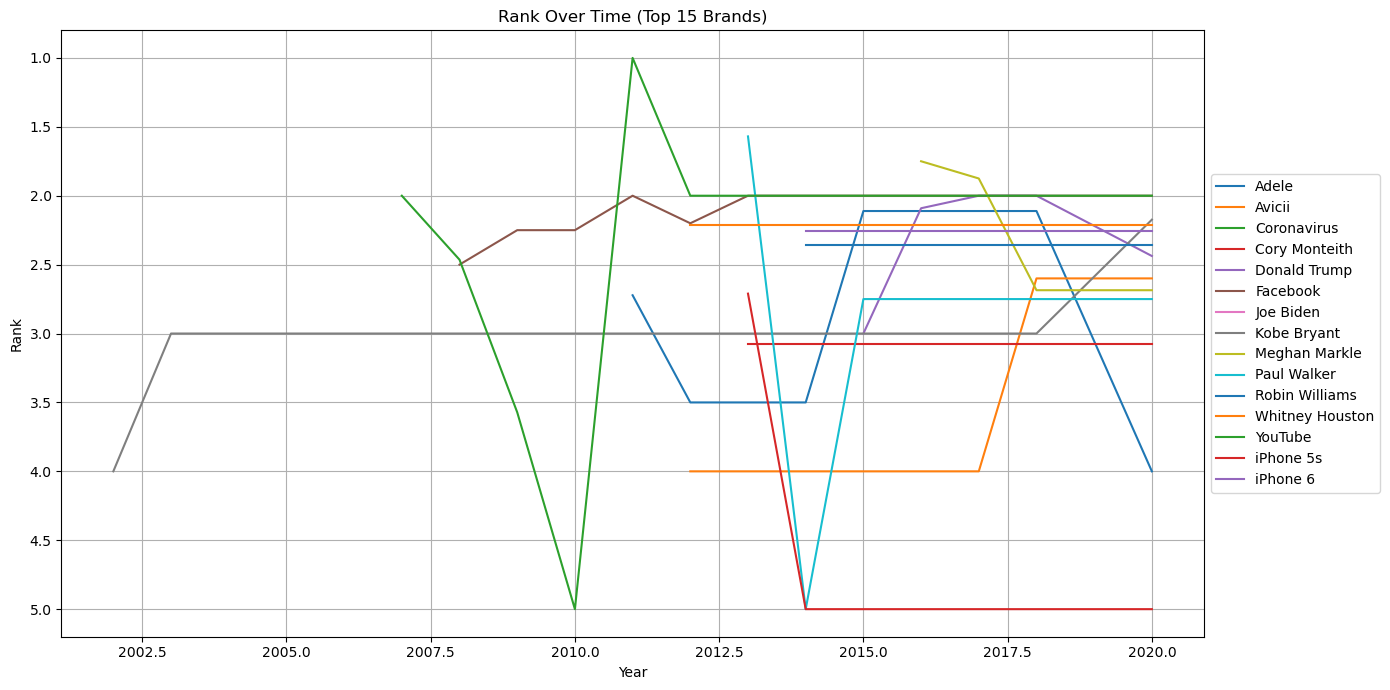

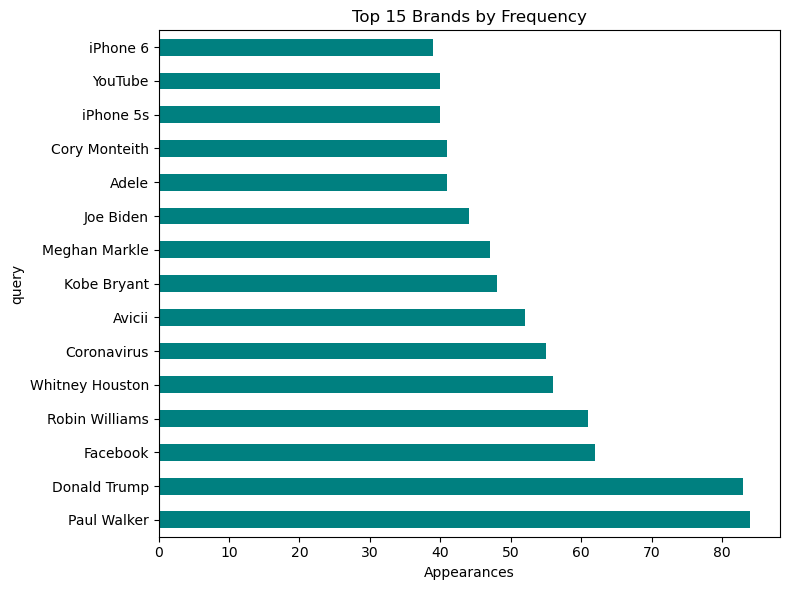

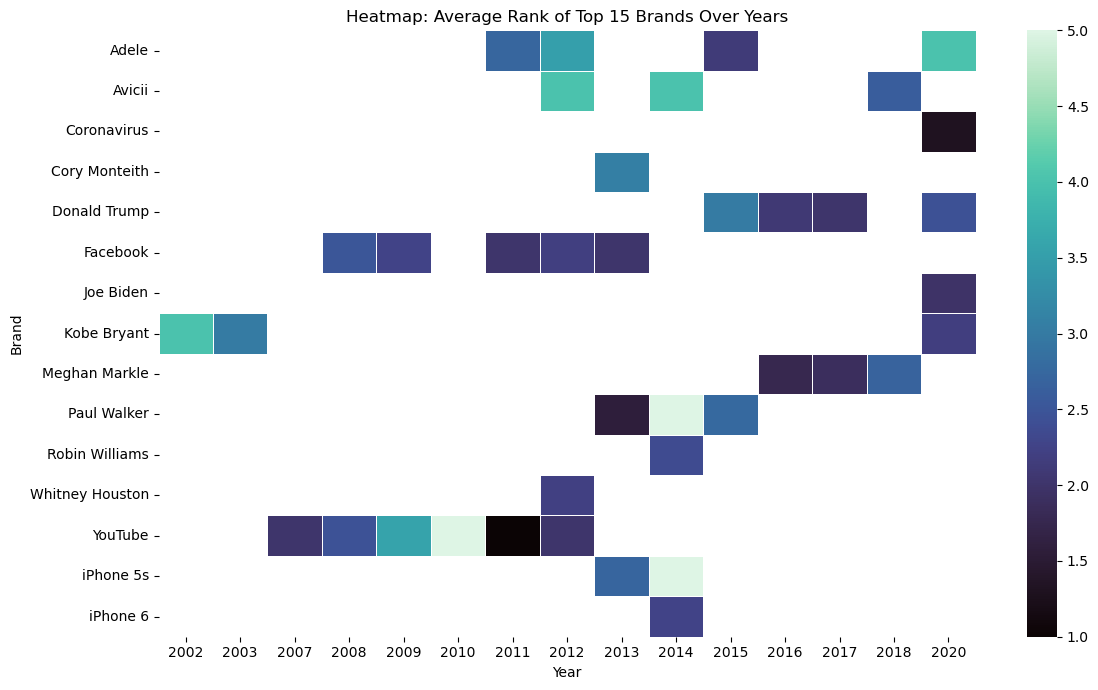

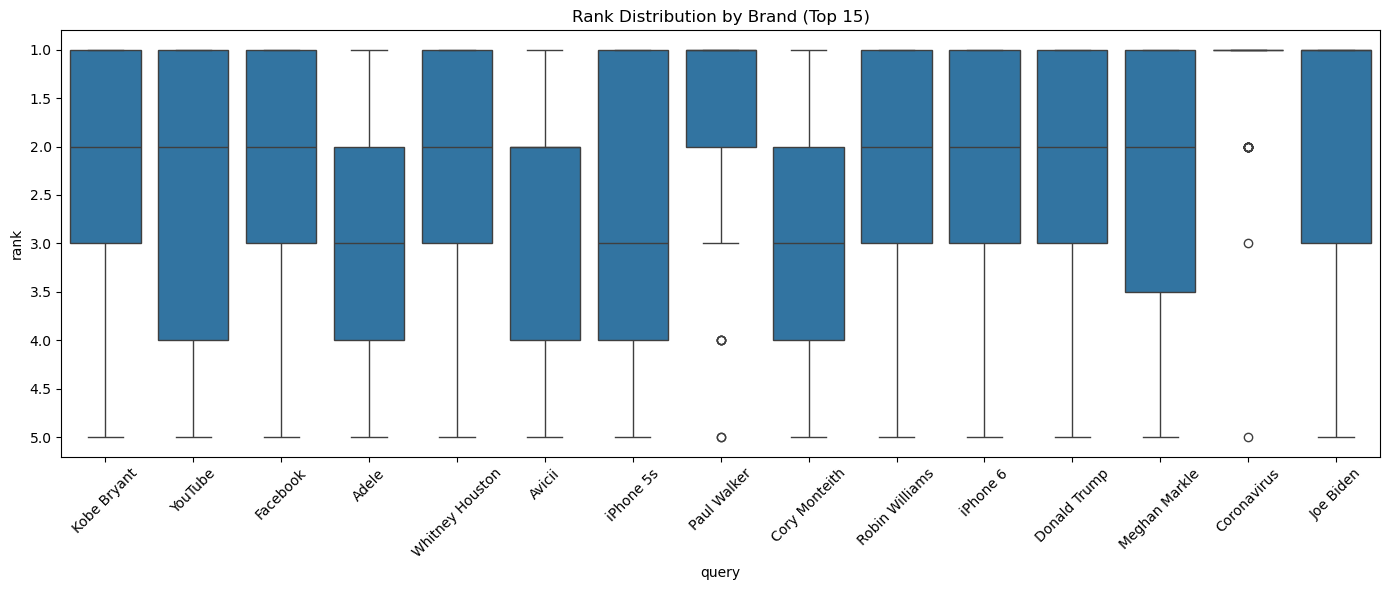

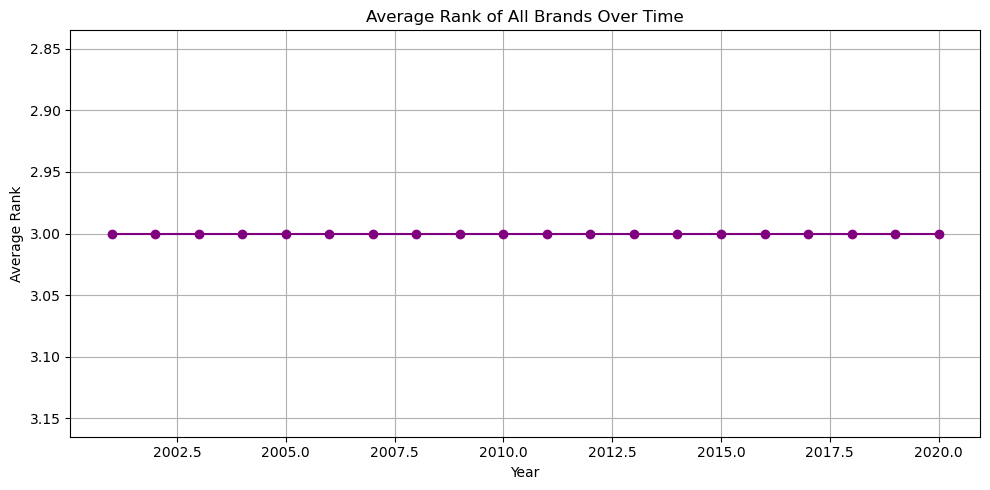

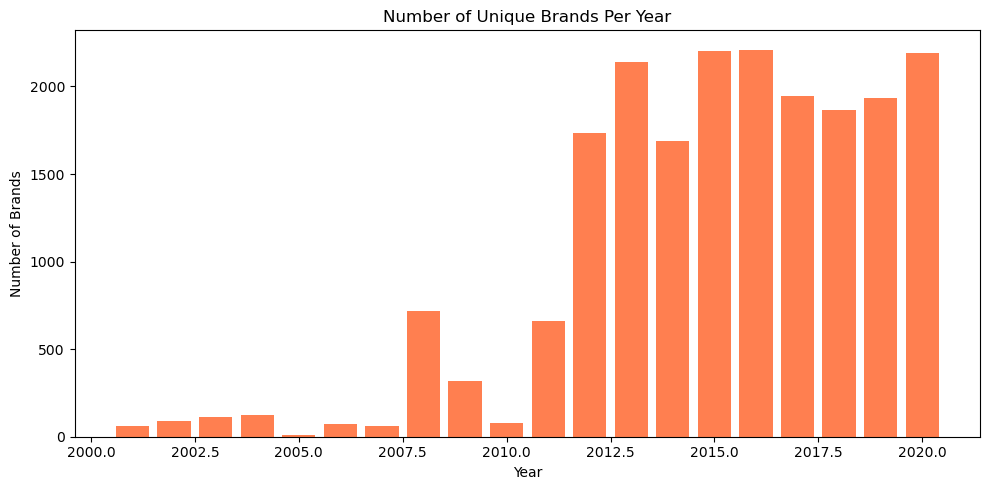

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

# Show Plotly charts in browser
pio.renderers.default = 'browser'

# Load the dataset
df = pd.read_csv(r"C:\rakshitha\2nd year\archive (1)\trends.csv")

# Drop missing and duplicate rows
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df['year'] = df['year'].astype(int)

# --- Get top 15 most frequent brands ---
top_brands = df['query'].value_counts().head(15).index
df_top = df[df['query'].isin(top_brands)]

# --- Pivot only top brands ---
df_pivot = df_top.pivot_table(index='year', columns='query', values='rank', aggfunc='mean')
df_pivot = df_pivot.ffill()


# --- Line Plot (Top 15 Brands Only) ---
plt.figure(figsize=(14, 7))
for brand in df_pivot.columns:
    plt.plot(df_pivot.index, df_pivot[brand], label=brand)
plt.gca().invert_yaxis()
plt.title('Rank Over Time (Top 15 Brands)')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Bar Chart: Frequency of Top 15 Brands ---
plt.figure(figsize=(8, 6))
df['query'].value_counts().head(15).plot(kind='barh', color='teal')
plt.title('Top 15 Brands by Frequency')
plt.xlabel('Appearances')
plt.tight_layout()
plt.show()

# --- Heatmap: Average Rank by Year for Top Brands ---
heatmap_data = df_top.pivot_table(index='query', columns='year', values='rank', aggfunc='mean')
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, cmap='mako', linewidths=0.5)
plt.title('Heatmap: Average Rank of Top 15 Brands Over Years')
plt.xlabel('Year')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

# --- Boxplot: Rank Distributions of Top Brands ---
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top, x='query', y='rank')
plt.title('Rank Distribution by Brand (Top 15)')
plt.xticks(rotation=45)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# --- Avg Rank Over Time (All Brands) ---
avg_rank_all = df.groupby('year')['rank'].mean()
plt.figure(figsize=(10, 5))
plt.plot(avg_rank_all.index, avg_rank_all.values, marker='o', color='purple')
plt.title('Average Rank of All Brands Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rank')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Number of Unique Brands Per Year ---
brands_per_year = df.groupby('year')['query'].nunique()
plt.figure(figsize=(10, 5))
plt.bar(brands_per_year.index, brands_per_year.values, color='coral')
plt.title('Number of Unique Brands Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Brands')
plt.tight_layout()
plt.show()

# --- Plotly Interactive Line Chart (Top Brands) ---
fig = px.line(df_top, x='year', y='rank', color='query',
              title='Interactive Line Plot - Top 15 Brands')
fig.update_yaxes(autorange='reversed')
fig.update_layout(height=600)
fig.show()

# --- Plotly Interactive Pie Chart (Top Brands by Frequency) ---
brand_counts = df['query'].value_counts().head(15).reset_index()
brand_counts.columns = ['Brand', 'Frequency']
fig_pie = px.pie(brand_counts, names='Brand', values='Frequency',
                 title='Top 15 Brands - Frequency Distribution',
                 hole=0.3)  # donut style
fig_pie.update_traces(textinfo='percent+label')
fig_pie.show()